In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-bright')

import collective_Smatrix as tools
import platonic_solid as positions

# Simple example of use of the collective scattering matrix
In this part we derive the collective scattering matrix of an ensemble of $N=5$ dipolar scatterers placed at the origin and on the vertices of a tetrahedron. Only the central dipole is absorbing. We study the modification in the absorption due to the presence of the outer non-absorbing shell by comparing the singular values of the collective scattering matrix to the ones obtained for the central absorber alone.

We begin by generating the matrix of the dipoles' positions from the `platonic` tool function. 

In [2]:
# generate positions on the vertices of a platonic solid

# ring radius
ka = np.pi
# tetrahedron (Nring=4)
N = 4+1
pos = np.zeros((3,N))
pos[:,:(N-1)] = positions.platonic(4, ka)
print(pos)

[[ 1.81379936  1.81379936 -1.81379936 -1.81379936  0.        ]
 [ 1.81379936 -1.81379936  1.81379936 -1.81379936  0.        ]
 [ 1.81379936 -1.81379936 -1.81379936  1.81379936  0.        ]]


Then we describe the optical properties of the dipoles, that are modelled by dielectric nanospheres of reduced radius $kR=0.8$, with constant dielectric function $\epsilon=10$. The central dipole has an additional absorption component with $\epsilon_C=\left( \sqrt{10} + 0.1 \imath \right)^2$.

In [3]:
# particle pseudo-radius
kR = 0.8

# optical properties of the dipoles
# for an artificial dielectric
eps0 = 10
eps = eps0 + np.zeros(N, dtype=np.complex_)
# add absorption for the central (last) dipole
eps[N-1] = (np.sqrt(eps0)+0.1*1j)**2

# clausius-Mossoti relation
alpha_0 = 4*np.pi*(eps-1)/(eps+2)*kR**3
# inclusion of radiative correction
alpha = alpha_0/(1-1j*alpha_0/(6*np.pi))

# Absorption of each dipole taken separately
print(np.imag(alpha)-np.abs(alpha)**2/(6*np.pi))

[-2.22044605e-16 -2.22044605e-16 -2.22044605e-16 -2.22044605e-16
  7.88004401e-02]


For this dipolar ensemble, we derive the collective scattering matrix $\mathcal{S}$ as well as the scattering matrix of the central absorber isolated $S_\mathrm{CA}$.

In [4]:
# number of multipoles to be included
lmax = 8

# buliding the S matrix of size Nsph by Nsph
S = tools.matrix_Sdip(pos,alpha,lmax)

# for comparison, same with only central absorber
S_CA = tools.matrix_Sdip(pos[:,[N-1]], [alpha[N-1]], lmax)

# singular value decomposition (Sigma is a numpy vector)
U, Sigma, V = np.linalg.svd(S)
U_CA, Sigma_CA, V_CA = np.linalg.svd(S_CA)

# get the singular values for the absorption operator
abstot = 1-Sigma*Sigma
abs_CA = 1-Sigma_CA*Sigma_CA

print('Number of surrounding dipoles :',N-1)
print('The maximum abs goes from', max(abs_CA), 'to', max(abstot))
print('The relative increase of the max absolute value is', (max(abstot)-max(abs_CA))/max(abs_CA))

Number of surrounding dipoles : 4
The maximum abs goes from 0.016721972749294656 to 0.01850376792936037
The relative increase of the max absolute value is 0.1065541253283571


# Figure 2a of the paper 
Here we replicate the figure 2a of the paper, which presents the relative increase in absorption due to the outer shell of non-absorbing dipoles, as a function of the shell radius, for different Platonic solids.
We begin by considering the central absorber alone, for which as expected only three spherical modes have non-zero absorption ($\ell=1$ and $m \in \{ -1, 0, 1\}$) and all three yield the same absorption singular value.

In [5]:
pos_origin = np.array([0, 0, 0]).reshape(3,-1)
S_CA = tools.matrix_Sdip(pos_origin, [alpha[N-1]], lmax)
U_CA, Sigma_CA, V_CA = np.linalg.svd(S_CA)
abs_CA = 1-Sigma_CA*Sigma_CA
print(abs_CA[abs_CA!=0])

[0.01672197 0.01672197 0.01672197]


Then we consider the collective ensemble, for which we set the number of scatterers ($N-1 \in [4, 6, 8, 12, 20]$) as well as the parameter $\ell_\mathrm{max}$ that controls the number of spherical modes $N_\mathrm{sph}=2\ell_\mathrm{max} (\ell_\mathrm{max}+2)$ to be included. As we will show in the end of the notebook, this number must be increased with the size of the collective ensemble to reach convergence.

In [6]:
lmax = 8
N = 4+1

pos = np.zeros((3,N))

# optical properties of the objects
# for an artificial dielectric
eps0 = 10
eps = eps0 + np.zeros(N, dtype=np.complex_)
# add absorption for the central (last) dipole
eps[N-1] = (np.sqrt(eps0)+0.1*1j)**2

# clausius-Mossoti relation
alpha_0 = 4*np.pi*(eps-1)/(eps+2)*kR**3
# inclusion of radiative correction
alpha = alpha_0/(1-1j*alpha_0/(6*np.pi))

ka_vect = np.arange(2,5.1,0.1)
z = 0*ka_vect

for i, ka in enumerate(ka_vect):
    pos[:,:(N-1)] = positions.platonic(N-1, ka)    
    print("["+str(i+1)+"/"+str(len(ka_vect))+"]", "Calculating for ka=", np.round(ka, 2), "...")
    S = tools.matrix_Sdip(pos, alpha, lmax)
    U, Sigma, V = np.linalg.svd(S)
    abstot = 1-Sigma*Sigma
    
    z[i] = (max(abstot)-max(abs_CA))/max(abs_CA)
    print('The relative increase of the max absolute value is', (max(abstot)-max(abs_CA))/max(abs_CA))

[1/31] Calculating for ka= 2.0 ...
The relative increase of the max absolute value is 0.05191450515145582
[2/31] Calculating for ka= 2.1 ...
The relative increase of the max absolute value is 0.02973862880885695
[3/31] Calculating for ka= 2.2 ...
The relative increase of the max absolute value is 0.018640930550898868
[4/31] Calculating for ka= 2.3 ...
The relative increase of the max absolute value is 0.016035477196079097
[5/31] Calculating for ka= 2.4 ...
The relative increase of the max absolute value is 0.01996798142006412
[6/31] Calculating for ka= 2.5 ...
The relative increase of the max absolute value is 0.028817151142641866
[7/31] Calculating for ka= 2.6 ...
The relative increase of the max absolute value is 0.04111047363223518
[8/31] Calculating for ka= 2.7 ...
The relative increase of the max absolute value is 0.055415384975301824
[9/31] Calculating for ka= 2.8 ...
The relative increase of the max absolute value is 0.07029096226403135
[10/31] Calculating for ka= 2.9 ...
The re

And we get the first curve in Fig 2a of the paper:

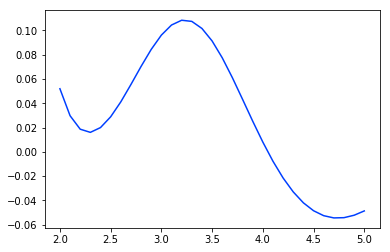

In [7]:
plt.plot(ka_vect, z)
plt.show()

Now we upload the results of such computations for different values of $N$ and plot fig 2a of the paper.

In [8]:
import pandas as pd
df = pd.read_pickle('save_fig1.pickle')
dz = df[df.lmax==8].set_index('N')['vector'].to_dict()

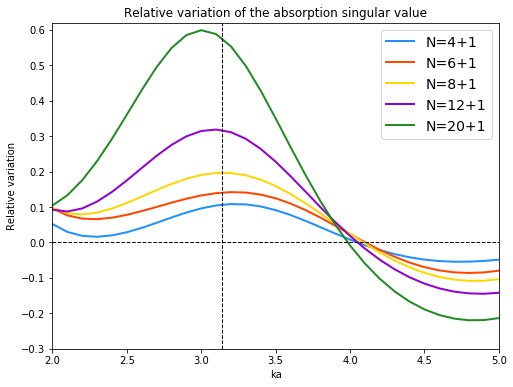

In [9]:
style.use('seaborn-bright')
plt.figure(figsize=(8, 6))
plt.plot(ka_vect, dz[4], linewidth=2, color='dodgerblue')
plt.plot(ka_vect, dz[6], linewidth=2, color='orangered')
plt.plot(ka_vect, dz[8], linewidth=2, color='gold')
plt.plot(ka_vect, dz[12], linewidth=2, color='darkviolet')
plt.plot(ka_vect, dz[20], linewidth=2, color='forestgreen')
plt.grid(False)
plt.axhline(linestyle='--', color="black", linewidth=1)
plt.axvline(x=np.pi, linestyle='--', color="black", linewidth=1)
plt.legend(["N=4+1", "N=6+1", "N=8+1", "N=12+1", "N=20+1"], fontsize=14)
plt.xlim(2, 5)
plt.xlabel('ka')
plt.ylabel('Relative variation')
plt.ylim(-0.3, 0.62)
plt.yticks(np.arange(-0.3, 0.7, 0.1))
plt.title('Relative variation of the absorption singular value')
#plt.savefig('figures/fig2a.png')
plt.show()

# Fig 2b of the paper
Here we replicate the figure 2b of the paper, which presents an histogram grouped by values of $\ell$ of the spherical components of the incoming mode responsible for maximum absorption for the collective dipolar system.

In [10]:
lmax = 8
ka = np.pi
kR = 0.8
N = 6+1

pos = np.zeros((3,N))
pos[:,:(N-1)] = positions.platonic(N-1, ka)

eps0 = 10
eps = eps0 + np.zeros(N, dtype=np.complex_)
eps[N-1] = (np.sqrt(eps0)+0.1*1j)**2

alpha_0 = 4*np.pi*(eps-1)/(eps+2)*kR**3
alpha = alpha_0/(1-1j*alpha_0/(6*np.pi))

S = tools.matrix_Sdip(pos, alpha, lmax)
U, Sigma, V = np.linalg.svd(S)

We write a small function to group amplitudes by values of $\ell$, separating electric and magnetic components ($A_{\ell, m}$ and $B_{\ell, m}$ coefficients int he decomposition) and apply it to the mode that yields maximum absorption.

In [11]:
def histo_freefield(v, lmax):
    '''
    function that prepares data for the histogram 1b
    by gathering amplitudes by values of l
    of the mode with maximum absorption
    v vector of size Nsph=2*lmax*(2*lmax+1)
    '''

    # l from 1 to lmax
    # m from -lmax to +lmax
    n = lmax*(2*lmax+1)
    A2 = np.zeros((lmax,2))

    for l in range(1, lmax+1):
        for m in range(-l, l+1):
            ind = (l-1)*(2*lmax+1)+m+lmax
            A2[l-1,0] += np.abs(v[ind])**2
            A2[l-1,1] += np.abs(v[n+ind])**2
    return np.sqrt(A2)

ampl = histo_freefield(V[-1, :].conj(), lmax)

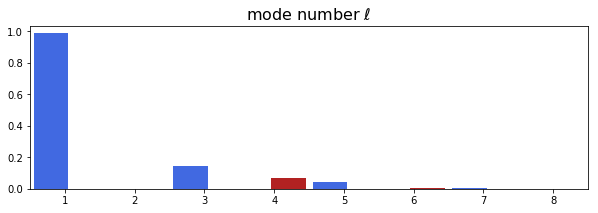

In [12]:
plt.figure(figsize=(10, 3))
plt.bar(np.arange(1, lmax+1)-0.2, ampl[:,0], width=0.5, align='center', color='royalblue')
plt.bar(np.arange(1, lmax+1)+0.2, ampl[:,1], width=0.5, align='center', color='firebrick')
plt.xlim(0.5, 8.5)
plt.title("mode number $\ell$", fontsize=16)
#plt.savefig("figures/fig2b.png")
plt.show()

# Test convergence on lmax
Here we illustrate the idea that $\ell_\mathrm{max}$ must be increased with the system size until convergence is reached, by comparing the values obtained for the case $N=4+1$ with increasing values of $\ell_\mathrm{max}$.

In [13]:
df = pd.read_pickle('save_fig1.pickle')
dz = df[df.N==4].set_index('lmax')['vector'].to_dict()

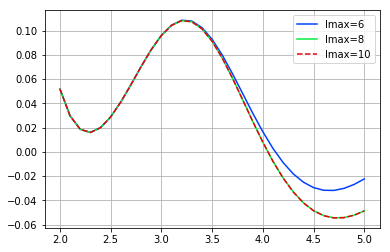

In [14]:
plt.plot(ka_vect, dz[6])
plt.plot(ka_vect, dz[8])
plt.plot(ka_vect, dz[10], '--')
plt.grid(True)
plt.legend(["lmax=6", "lmax=8", "lmax=10"])
plt.show()

## Additional cell used to store results of computations for fig.1a

In [ ]:
# save results of computations to pickle 
df = pd.DataFrame(columns=['N', 'lmax', 'vector'])
df = df.append({'N': 4, 'lmax': 6, 'vector': z_N4_lmax6}, ignore_index=True)
df = df.append({'N': 4, 'lmax': 8, 'vector': z_N4_lmax8}, ignore_index=True)
df = df.append({'N': 4, 'lmax': 10, 'vector': z_N4_lmax10}, ignore_index=True)
df = df.append({'N': 6, 'lmax': 8, 'vector': z_N6_lmax8}, ignore_index=True)
df = df.append({'N': 8, 'lmax': 8, 'vector': z_N8_lmax8}, ignore_index=True)
df = df.append({'N': 12, 'lmax': 8, 'vector': z_N12_lmax8}, ignore_index=True)
df = df.append({'N': 20, 'lmax': 8, 'vector': z_N20_lmax8}, ignore_index=True)
#df.to_pickle('save_fig1.pickle')